In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict
from sklearn.model_selection import GridSearchCV
import joblib

In [120]:
df =pd.read_csv(r'C:\Users\AcTivE\Desktop\Project TM471\Data\breast-cancer.csv')

In [121]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
# Shape Of The Dataset
df.shape

(569, 32)

In [5]:
#some ifo about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#treget val 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

-  M : Malignant ,  B : Benign

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [8]:
# let’s see if there are null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# let’s see if there are duplicated values
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

- Correlation between all features

In [10]:
# col 'id' doesn't contain any useful information so we can drop it
df = df.drop(['id'],axis=1)

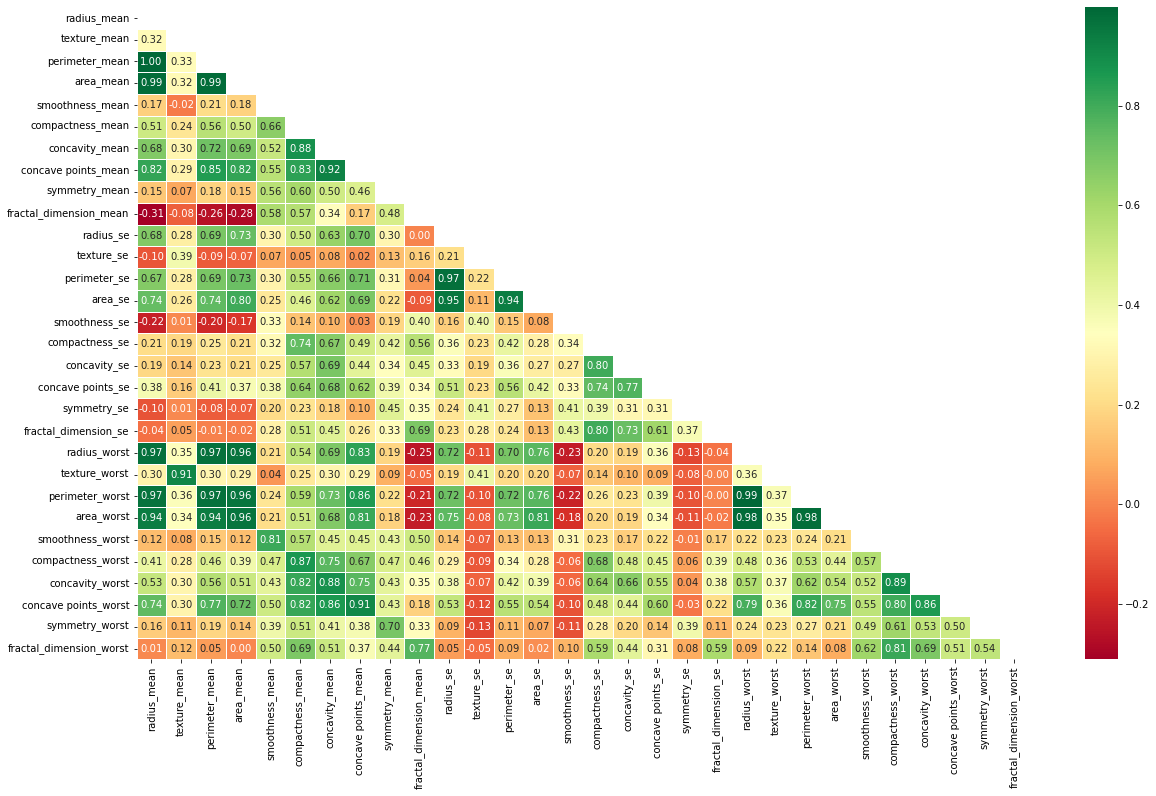

In [11]:
#Correlation 

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f",cmap = 'RdYlGn',)
plt.show()

- Highly correlated features refer to variables that have a strong linear relationship with each other. The presence of highly correlated features can lead to several issues, and removing them is often beneficial.

# Univariate Analysis

In [12]:
num_col= df.drop(['diagnosis'],axis=1)

In [13]:
for variable in num_col:
    # Define your desired color sequence
    color_sequence = ['#FF5733', '#C70039', '#900C3F', '#581845', '#FFC300', '#FF5733', '#FF5733']
    # Create a figure
    fig = px.histogram(df, x=variable, marginal='box', title=f'Univariate Analysis of {variable}', 
                       labels={'count': 'Frequency', variable: variable},color_discrete_sequence=color_sequence)
    
    # Update layout for better visualization
    fig.update_layout(
        height=500,
        bargap=0.1,
        bargroupgap=0.1,
        xaxis=dict(title=variable),
        yaxis=dict(title="Frequency"),
        title=dict(x=0.5),
        showlegend=False
    )
    
    # Show the plot
    fig.show()

- We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [14]:
# Define colors for each diagnosis category
colors = {'M': '#FF5733', 'B': '#581845'}

# Perform univariate analysis for diagnosis
fig = px.histogram(df, x="diagnosis", title="Bar Plot - Diagnosis", 
                   labels={"count": "Frequency", "diagnosis": "diagnosis"},
                   color="diagnosis", color_discrete_map=colors)
fig.update_layout(xaxis_title="diagnosis", yaxis_title="Frequency")
fig.show()

# Bivariate Analysis

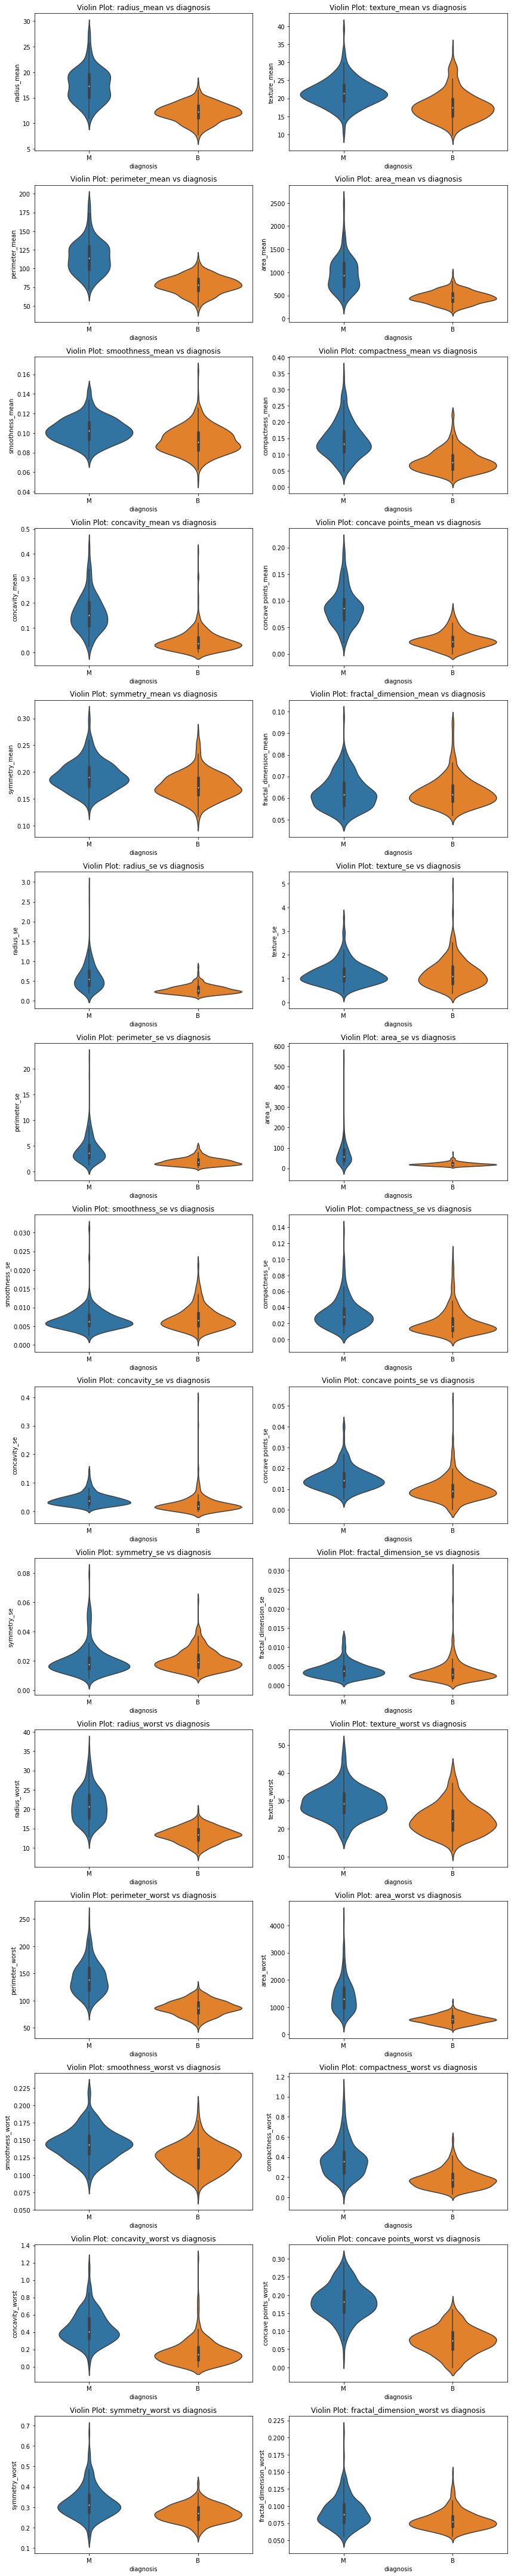

In [15]:
# Get the list of column names except for "HeartDisease"
variables = [col for col in df.columns if col != "diagnosis"]

# Define the grid layout based on the number of variables
num_variables = len(variables)
num_cols = 2  # Number of columns in the grid
num_rows = (num_variables + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set the size of the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Generate violin plots for each variable with respect to HeartDisease
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]
    
    sns.violinplot(data=df, x="diagnosis", y=variable, ax=ax)
    ax.set_xlabel("diagnosis")
    ax.set_ylabel(variable)
    ax.set_title(f"Violin Plot: {variable} vs diagnosis")
# Remove any empty subplots
if num_variables < num_rows * num_cols:
    for i in range(num_variables, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Feature Engineering (Data Pre-processing)

In [35]:
# Handling Categorical Variables
enc = LabelEncoder()

In [36]:
df_encoded = df.copy()

In [37]:
df_encoded['diagnosis'] =enc.fit_transform(df['diagnosis'])


In [38]:
# removing highly correlated features

corr_matrix = df_encoded.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.9)] 

# to_drop

df_clean = df_encoded.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df_clean.shape[1]} columns.")

The reduced dataframe has 21 columns.


In [41]:
# Spliting data
X = df_clean.drop('diagnosis', axis=1).values
y = df_clean['diagnosis'].values

In [73]:
df_clean.head(1)

diagnosis  smoothness_mean  compactness_mean  symmetry_mean  \
0          1           0.1184            0.2776         0.2419   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  compactness_se  \
0                 0.07871      0.9053    153.4       0.006399         0.04904   

   concavity_se  ...  symmetry_se  fractal_dimension_se  texture_worst  \
0       0.05373  ...      0.03003              0.006193          17.33   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                   0.1189  

[1 rows x 21 columns]

In [74]:
# Define preprocessor for NumPy arrays
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [6, 12, 13]) # column indices for numerical features
    ])

In [58]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric="error", objective="binary:logistic")
}

# KFold cross-validation for evaluation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results across folds
results = defaultdict(lambda: defaultdict(list))
    

C:\Users\AcTivE\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [59]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name, fold):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['M', 'B'], #M = malignant, B = benign
                yticklabels=['M', 'B'])
    plt.title(f"Confusion Matrix for {model_name} (Fold {fold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


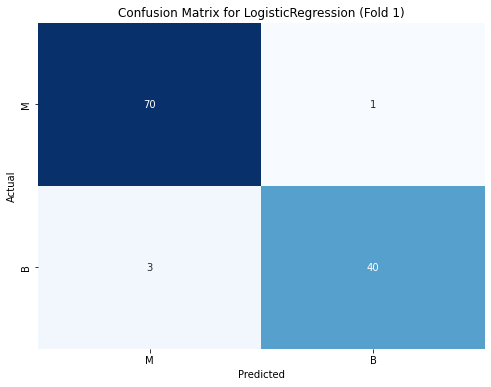

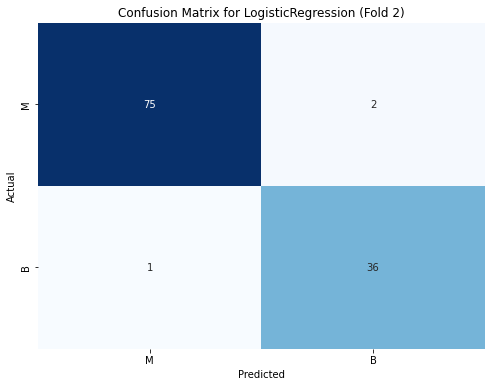

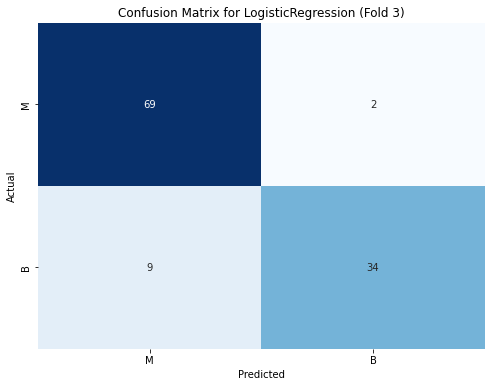

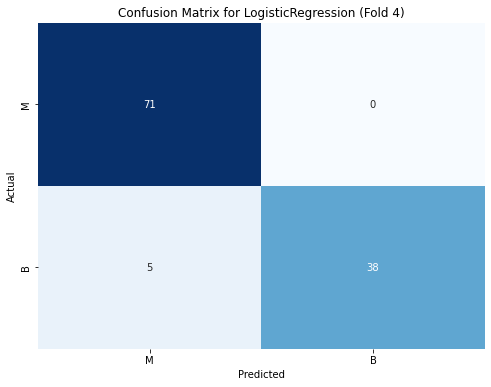

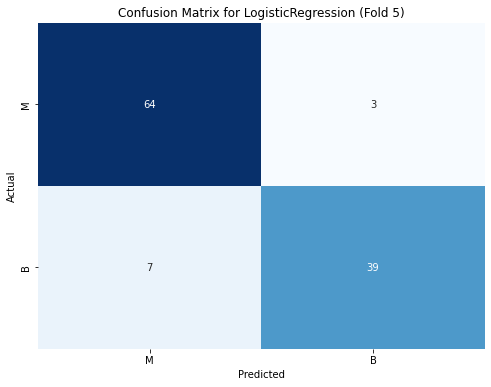

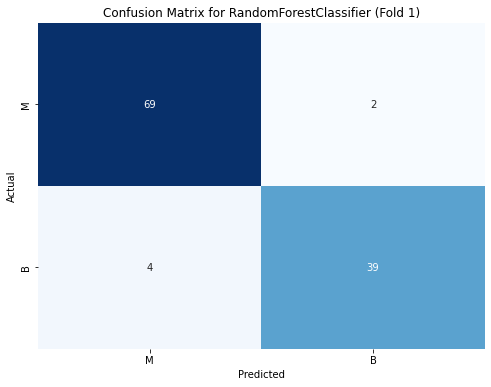

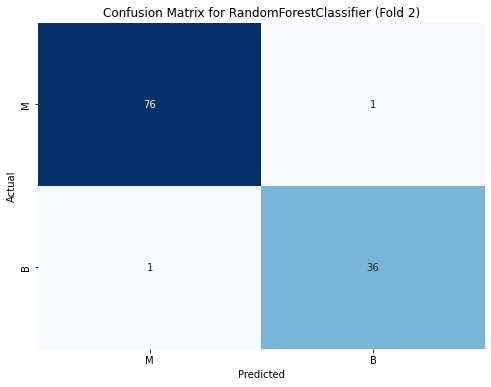

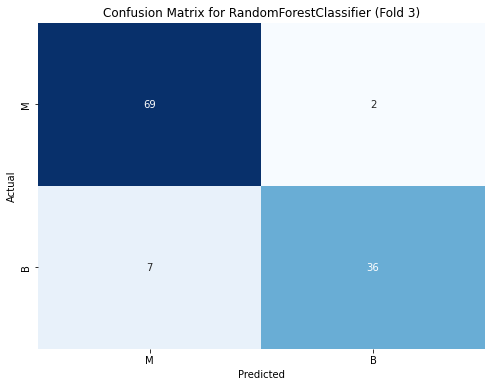

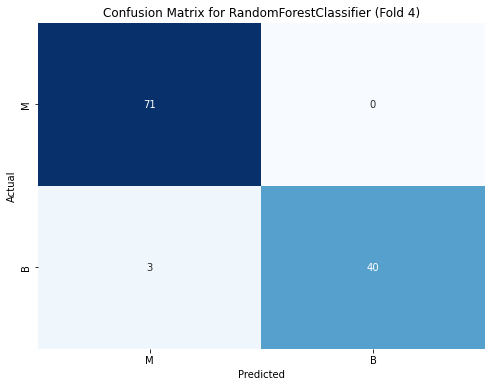

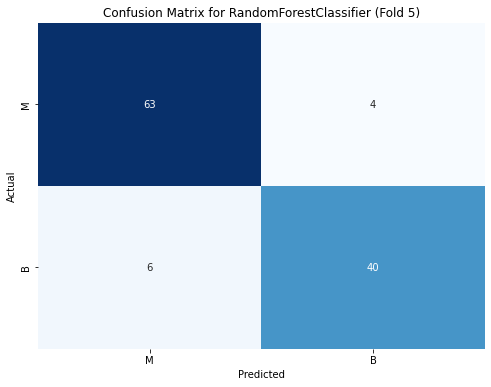

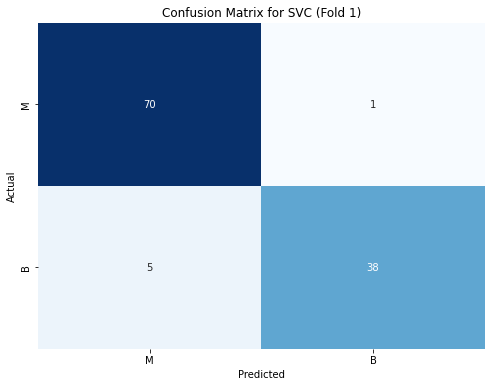

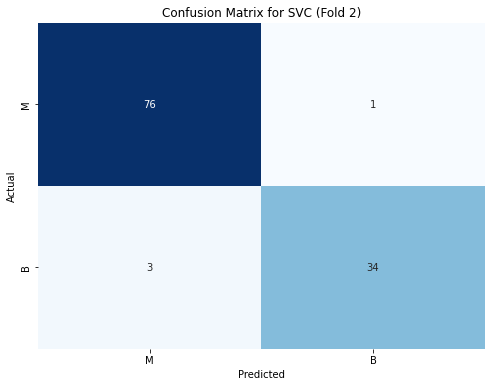

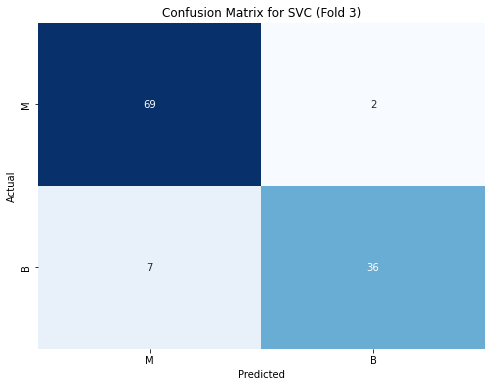

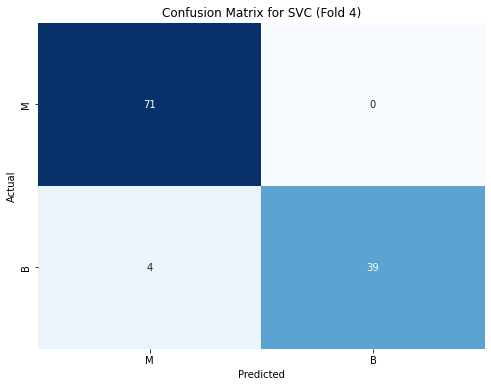

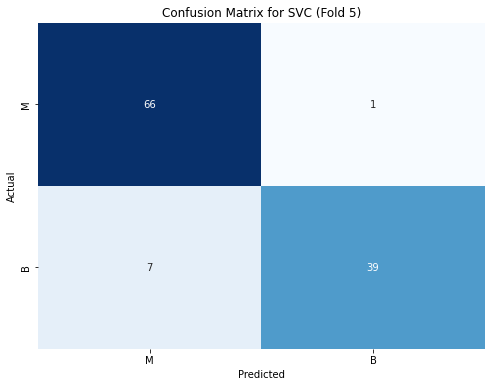

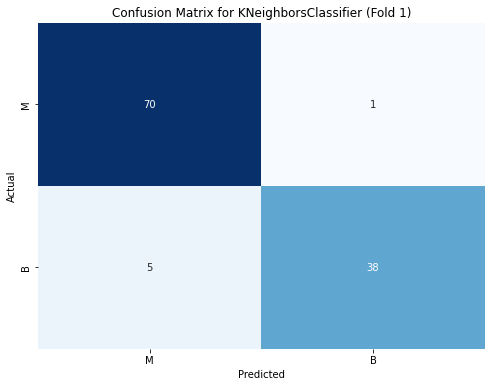

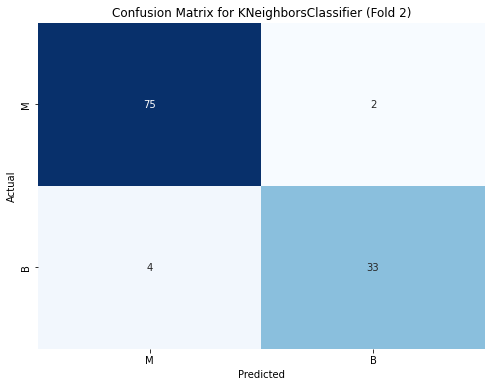

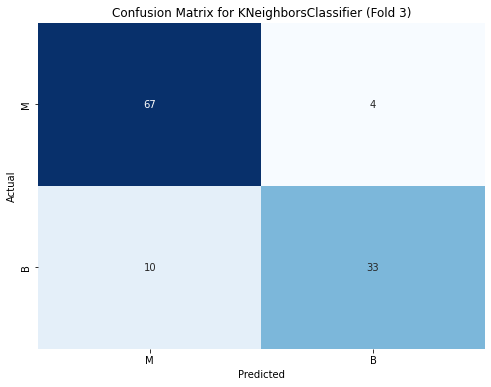

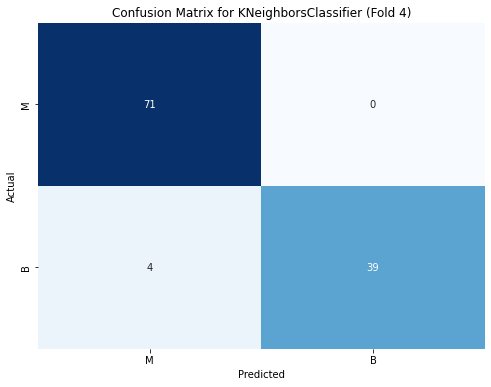

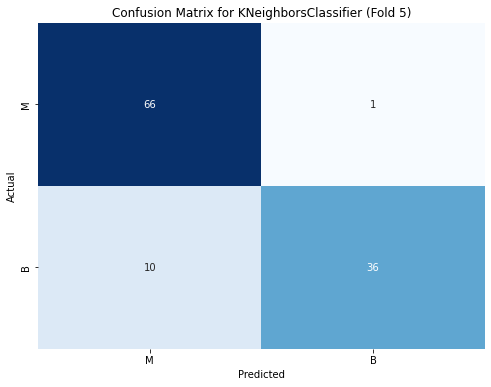

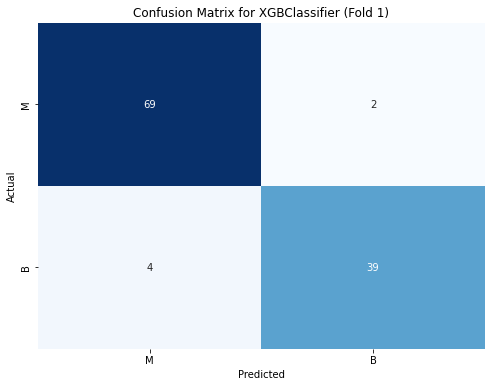

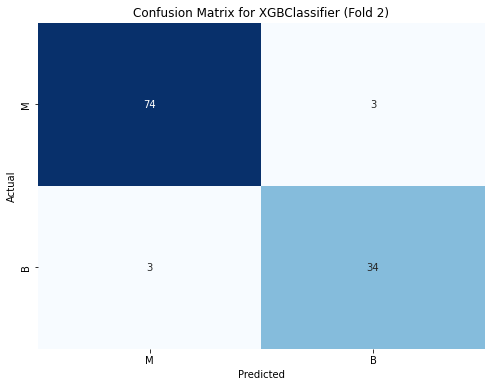

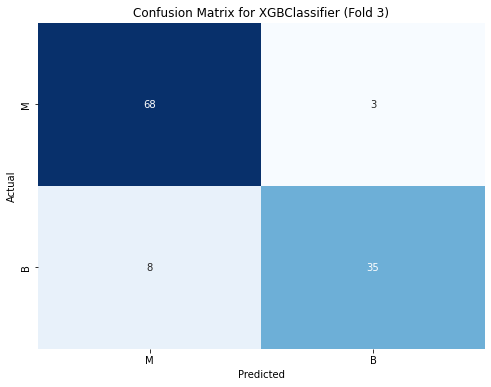

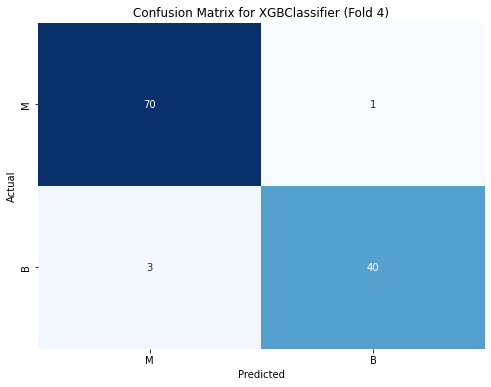

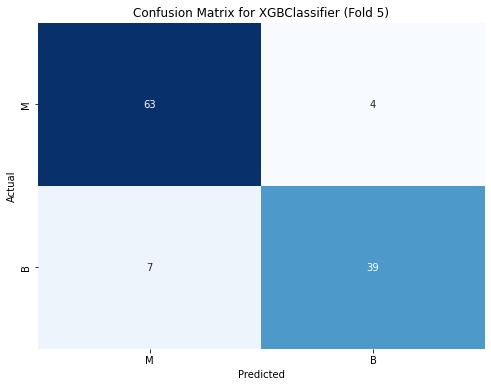

In [75]:
# Iterate through models and perform cross-validation
for model_name, model in models.items():
    for fold, (train_index, test_index) in enumerate(cv.split(X), 1):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define pipeline steps
        pipe_steps = [
            ('preprocessor', preprocessor),
            ('classifier', model)
        ]

        # Create the pipeline
        pipeline = Pipeline(steps=pipe_steps)

        # Fit the pipeline on the resampled training data
        pipeline.fit(X_train, y_train)

        # Evaluate the pipeline on the test data
        y_pred = pipeline.predict(X_test)

        # Store metrics for each fold
        results[model_name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[model_name]['precision'].append(precision_score(y_test, y_pred))
        results[model_name]['recall'].append(recall_score(y_test, y_pred))
        results[model_name]['f1'].append(f1_score(y_test, y_pred))

        # Print confusion matrix for each fold
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, model_name, fold)

In [76]:
# Print the mean scores and choose the best model
best_model = None
best_mean_accuracy = 0

for model_name, metrics in results.items():
    mean_accuracy = np.mean(metrics['accuracy'])
    mean_precision = np.mean(metrics['precision'])
    mean_recall = np.mean(metrics['recall'])
    mean_f1 = np.mean(metrics['f1'])

print(f"\nModel: {model_name}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")

# Choose the best model based on mean accuracy
if mean_accuracy > best_mean_accuracy:
    best_model = model_name
    best_mean_accuracy = mean_accuracy

print(f"\nBest Model: {best_model} with Mean Accuracy: {best_mean_accuracy:.4f}")


Model: XGBClassifier
Mean Accuracy: 0.9332
Mean Precision: 0.9348
Mean Recall: 0.8836
Mean F1-score: 0.9081

Best Model: XGBClassifier with Mean Accuracy: 0.9332


In [86]:
# Parameters for XGBClassifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Display the best parameters and the corresponding mean cross-validated score
print(f"\nBest Parameters for {best_model}: {grid_search.best_params_}")
print(f"Best Mean Accuracy for {best_model}: {grid_search.best_score_:.4f}")


C:\Users\AcTivE\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Fitting 5 folds for each of 729 candidates, totalling 3645 fits

Best Parameters for XGBClassifier: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.9}
Best Mean Accuracy for XGBClassifier: 0.9525


In [89]:
# Set the best hyperparameters
best_hyperparameters = {
    'classifier__colsample_bytree': 0.8,
    'classifier__learning_rate': 0.1,
    'classifier__max_depth': 5,
    'classifier__min_child_weight': 3,
    'classifier__n_estimators': 100,
    'classifier__subsample': 0.9
}
# Update the pipeline with the best hyperparameters
pipeline.set_params(**best_hyperparameters)

# Train the final model on the entire training dataset
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [6, 12, 13])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

In [90]:
y_pred_test = pipeline.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Test Accuracy: 0.9646
Test Precision: 0.9773
Test Recall: 0.9348
Test F1-score: 0.9556


In [94]:
# Save the trained model using joblib
joblib.dump(pipeline, 'diagnosis.joblib')


['diagnosis.joblib']

In [95]:
# Load the saved model
loaded_model = joblib.load('diagnosis.joblib')

In [96]:
loaded_model.n_features_in_

20

In [144]:
df_clean.columns

Index(['diagnosis', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [132]:
# Create a NumPy array for the new data point
new_data_point = np.array([[0.1184, 0.2776, 0.2419, 0.07871, 0.9053, 153.4,0.006399, 140,0.01587, 0.04904,0.05373,0.03003, 0.006193,17.33 , 2019.0,0.1622,0.6656 , 0.7119, 0.2654,0.4601 ]])

# Make predictions using the loaded model
prediction = loaded_model.predict(new_data_point)

# Display the prediction
print("Prediction:", prediction)


Prediction: [0]
